# Integer Encoding

In [1]:
# torchtext 설치
!pip install torchtext

In [2]:
import pandas as pd 
import numpy as np 
from tqdm.auto import tqdm

import torch 
from torchtext.vocab import build_vocab_from_iterator

c:\Users\hyenz\anaconda3\envs\ml\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### DictVectorizer
각 단어의 수를 세어놓은 사전에서 BOW 인코딩 벡터를 만든다.
- Bag of Words는 문서가 가지는 모든 단어(Words)를 문맥이나 순서를 무시하고 일괄적으로 단어에 대해 빈도 값을 부여해 피처 값을 추출하는 방법이다.

In [3]:
from sklearn.feature_extraction import DictVectorizer

vect = DictVectorizer(sparse=False)

In [4]:
data = [{'A': 1, 'B': 2}, {'B': 3, 'C': 1}]
X = vect.fit_transform(data) # 인코딩 수치 벡터로 변환(X)

- 1번 문장
    - A: 1, B: 2,(C: 0)     = [1, 2, 0]
- 2번 문장
    - (A: 0), B: 3, C: 1    = [0, 3, 1]

으로 변환됨

- 컬럼 열의 길이 -> 학습되어 등록된 데이터의 수
- row 행의 길이 -> 트랜스폼한 데이터의 갯수

In [5]:
X

array([[1., 2., 0.],
       [0., 3., 1.]])

X는 아래와 같이 변환됨   
> {'A': 1, 'B': 2} -> [1, 2, 0]    
> {'B': 3, 'C': 1} -> [0, 3, 1]

In [9]:
vect.feature_names_

['A', 'B', 'C']

In [10]:
vect.transform({'A': 1, 'E': 3}) # E는 제외됨

array([[1., 0., 0.]])

In [11]:
vect.transform({'C': 4, 'D': 3}) # D는 제외됨

array([[0., 0., 4.]])

### CountVectorizer
> 문서 집합에서 단어 토큰을 생성하고 각 단어의 수를 세어 BOW 인코딩 벡터를 만든다.

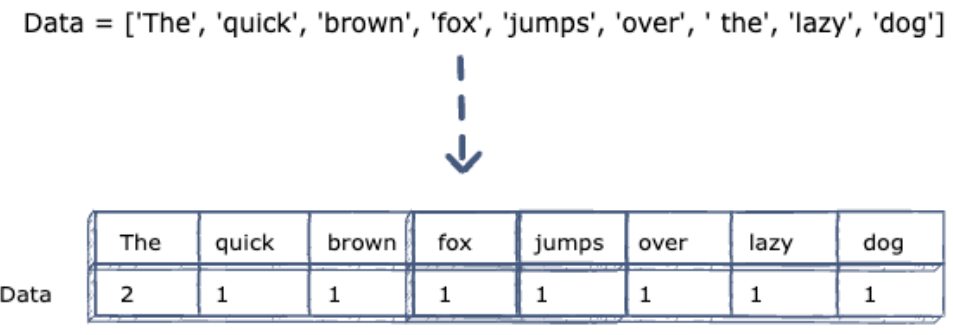

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

In [13]:
corpus = [
    'This is the first document.',
    'This is the second second document.',
    'And the third one.',
    'Is this the first document?',
    'The last document?',
]

In [14]:
from pprint import pprint
vect = CountVectorizer()
vect.fit(corpus)
voca_dict = dict(vect.vocabulary_)
print(voca_dict)
voca_dict = dict(sorted(voca_dict.items(), key=lambda x: x[1]))
print(voca_dict)
# 자동으로 소문자화 되어 fit됨.
# 학습된 순서대로 정렬되어 있으나, 알파벳순서대로 인덱스가 부여됨.

{'this': 9, 'is': 3, 'the': 7, 'first': 2, 'document': 1, 'second': 6, 'and': 0, 'third': 8, 'one': 5, 'last': 4}
{'and': 0, 'document': 1, 'first': 2, 'is': 3, 'last': 4, 'one': 5, 'second': 6, 'the': 7, 'third': 8, 'this': 9}


In [15]:
vect.transform(['This This is the second document.']).toarray()

array([[0, 1, 0, 1, 0, 0, 1, 1, 0, 2]], dtype=int64)

In [16]:
vect.transform(['Something completely new.']).toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

In [17]:
vect.transform(corpus).toarray()

array([[0, 1, 1, 1, 0, 0, 0, 1, 0, 1],
       [0, 1, 0, 1, 0, 0, 2, 1, 0, 1],
       [1, 0, 0, 0, 0, 1, 0, 1, 1, 0],
       [0, 1, 1, 1, 0, 0, 0, 1, 0, 1],
       [0, 1, 0, 0, 1, 0, 0, 1, 0, 0]], dtype=int64)

#### stop words
> stop words는 문서에서 단어장을 생성할 때 무시할 수 있는 단어를 말한다. 보통 관사, 접속사, 조사 등이 여기에 해당한다.

In [18]:
vect = CountVectorizer(stop_words=["and", "is", "the", "this"]).fit(corpus)
# stop_words: 불용어 처리(무시)
vect.vocabulary_

{'first': 1, 'document': 0, 'second': 4, 'third': 5, 'one': 3, 'last': 2}

In [19]:
vect.transform(corpus).toarray()

array([[1, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 2, 0],
       [0, 0, 0, 1, 0, 1],
       [1, 1, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0]], dtype=int64)

#### token
> analyzer, tokenizer 등의 인수로 사용할 토큰 생성기를 선택할 수 있다.

In [40]:
vect = CountVectorizer(analyzer="char").fit(corpus)
# analyzer: 문자 단위로 카운트
vect.vocabulary_

{'t': 16,
 'h': 8,
 'i': 9,
 's': 15,
 ' ': 0,
 'e': 6,
 'f': 7,
 'r': 14,
 'd': 5,
 'o': 13,
 'c': 4,
 'u': 17,
 'm': 11,
 'n': 12,
 '.': 1,
 'a': 3,
 '?': 2,
 'l': 10}

In [21]:
vect.transform(corpus).toarray()

array([[4, 1, 0, 0, 1, 1, 2, 1, 2, 3, 0, 1, 1, 1, 1, 3, 4, 1],
       [5, 1, 0, 0, 3, 3, 4, 0, 2, 2, 0, 1, 3, 3, 0, 4, 3, 1],
       [3, 1, 0, 1, 0, 2, 2, 0, 2, 1, 0, 0, 2, 1, 1, 0, 2, 0],
       [4, 0, 1, 0, 1, 1, 2, 1, 2, 3, 0, 1, 1, 1, 1, 3, 4, 1],
       [2, 0, 1, 1, 1, 1, 2, 0, 1, 0, 1, 1, 1, 1, 0, 1, 3, 1]],
      dtype=int64)

In [22]:
# nltk 설치
!pip install nltk

In [36]:
import nltk
# nltk : 자연어 처리를 위한 파이썬 패키지
# 형태소 분석기
nltk.download('punkt')
# punkt : 영어 문장 토큰화를 위한 토크나이저 모듈

vect = CountVectorizer(tokenizer=nltk.word_tokenize).fit(corpus)
# Vectorizer에 토크나이저를 적용 -> tokenizer 매개변수에 토크나이저 함수를 전달
vect.vocabulary_

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hyenz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
c:\Users\hyenz\anaconda3\envs\ml\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


{'this': 11,
 'is': 5,
 'the': 9,
 'first': 4,
 'document': 3,
 '.': 0,
 'second': 8,
 'and': 2,
 'third': 10,
 'one': 7,
 '?': 1,
 'last': 6}

#### N-gram
> N-gram은 단어장 생성에 사용할 토큰의 크기를 결정한다. 모노그램(monogram)은 토큰 하나만 단어로 사용하며 바이그램(bigram)은 두 개의 연결된 토큰을 하나의 단어로 사용한다.

In [37]:
vect = CountVectorizer(ngram_range=(2, 2)).fit(corpus) # 최소 2개, 최대 2개 문자로 구성 
vect.vocabulary_
# bigram으로 토큰화

{'this is': 12,
 'is the': 2,
 'the first': 7,
 'first document': 1,
 'the second': 9,
 'second second': 6,
 'second document': 5,
 'and the': 0,
 'the third': 10,
 'third one': 11,
 'is this': 3,
 'this the': 13,
 'the last': 8,
 'last document': 4}

In [38]:
vect = CountVectorizer(ngram_range=(1, 2)).fit(corpus) # 최소 1개, 최대 2개 문자로 구성 
vect.vocabulary_
# mono, bi-gram으로 토큰화

{'this': 21,
 'is': 5,
 'the': 14,
 'first': 3,
 'document': 2,
 'this is': 22,
 'is the': 6,
 'the first': 15,
 'first document': 4,
 'second': 11,
 'the second': 17,
 'second second': 13,
 'second document': 12,
 'and': 0,
 'third': 19,
 'one': 10,
 'and the': 1,
 'the third': 18,
 'third one': 20,
 'is this': 7,
 'this the': 23,
 'last': 8,
 'the last': 16,
 'last document': 9}

#### 빈도수
> `max_df, min_df`인수를 사용하여 문서에서 토큰이 나타난 횟수를 기준으로 단어장을 구성할 수도 있다.   
> 토큰의 빈도가 `max_df`로 지장한 값을 초과 하거나 `min_df`로 지정한 값보다 작은 경우에는 무시한다.

In [26]:
vect = CountVectorizer(max_df=4, min_df=2).fit(corpus) # 단어별 빈도수: 최대 4개, 최소 2개 
vect.vocabulary_, vect.stop_words_

({'this': 3, 'is': 2, 'first': 1, 'document': 0},
 {'and', 'last', 'one', 'second', 'the', 'third'})

### TfidfVectorizer
> `CountVectorizer`와 비슷하지만 TF-IDF 방식으로 단어의 가중치를 조정한 BOW 인코딩 벡터를 만든다.

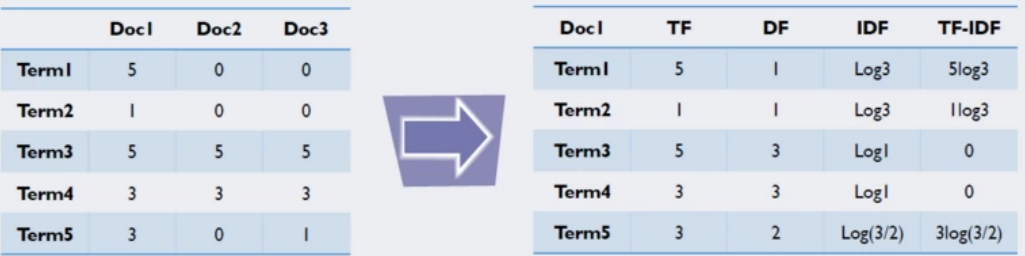

In [27]:
corpus

['This is the first document.',
 'This is the second second document.',
 'And the third one.',
 'Is this the first document?',
 'The last document?']

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidv = TfidfVectorizer().fit(corpus)
tfidv.transform(corpus).toarray()

array([[0.        , 0.38947624, 0.55775063, 0.4629834 , 0.        ,
        0.        , 0.        , 0.32941651, 0.        , 0.4629834 ],
       [0.        , 0.24151532, 0.        , 0.28709733, 0.        ,
        0.        , 0.85737594, 0.20427211, 0.        , 0.28709733],
       [0.55666851, 0.        , 0.        , 0.        , 0.        ,
        0.55666851, 0.        , 0.26525553, 0.55666851, 0.        ],
       [0.        , 0.38947624, 0.55775063, 0.4629834 , 0.        ,
        0.        , 0.        , 0.32941651, 0.        , 0.4629834 ],
       [0.        , 0.45333103, 0.        , 0.        , 0.80465933,
        0.        , 0.        , 0.38342448, 0.        , 0.        ]])

In [29]:
pd.DataFrame(tfidv.transform(corpus).toarray(), columns = tfidv.get_feature_names_out())

,and,document,first,is,last,one,second,the,third,this
0,0.000000,0.389476,0.557751,0.462983,0.000000,0.000000,0.000000,0.329417,0.000000,0.462983
1,0.000000,0.241515,0.000000,0.287097,0.000000,0.000000,0.857376,0.204272,0.000000,0.287097
2,0.556669,0.000000,0.000000,0.000000,0.000000,0.556669,0.000000,0.265256,0.556669,0.000000
3,0.000000,0.389476,0.557751,0.462983,0.000000,0.000000,0.000000,0.329417,0.000000,0.462983
4,0.000000,0.453331,0.000000,0.000000,0.804659,0.000000,0.000000,0.383424,0.000000,0.000000


## WordCloud
> 단어구름 만들어 시각화하기

In [30]:
!pip install wordcloud

In [31]:
from wordcloud import WordCloud
wc = WordCloud(background_color="white",width=500,height=500)

In [32]:
vect = CountVectorizer()
tdm = vect.fit_transform(corpus)
tdm

<5x10 sparse matrix of type '<class 'numpy.int64'>'
	with 22 stored elements in Compressed Sparse Row format>

In [33]:
df_tdm = pd.DataFrame(tdm.toarray(),columns=vect.get_feature_names_out())
df_tdm

,and,document,first,is,last,one,second,the,third,this
0,0,1,1,1,0,0,0,1,0,1
1,0,1,0,1,0,0,2,1,0,1
2,1,0,0,0,0,1,0,1,1,0
3,0,1,1,1,0,0,0,1,0,1
4,0,1,0,0,1,0,0,1,0,0


In [34]:
df_tdm.sum().to_dict()

{'and': 1,
 'document': 4,
 'first': 2,
 'is': 3,
 'last': 1,
 'one': 1,
 'second': 2,
 'the': 5,
 'third': 1,
 'this': 3}

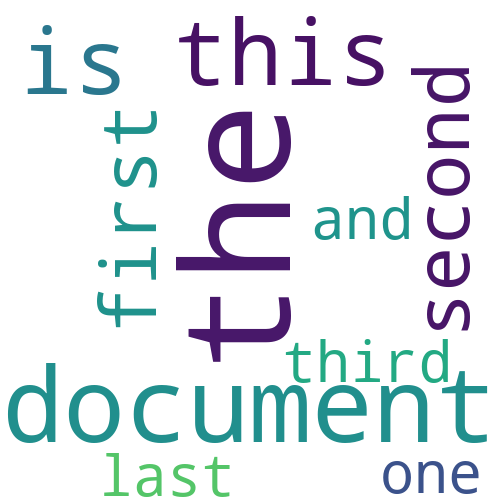

In [35]:
cloud = wc.generate_from_frequencies(df_tdm.sum().to_dict())
cloud.to_image()

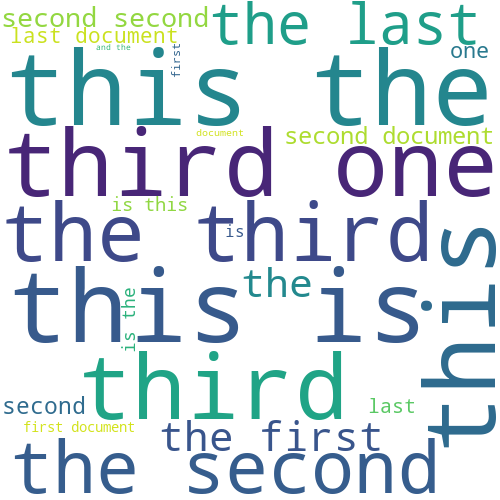

In [39]:
cloud = wc.generate_from_frequencies(vect.vocabulary_)
cloud.to_image()

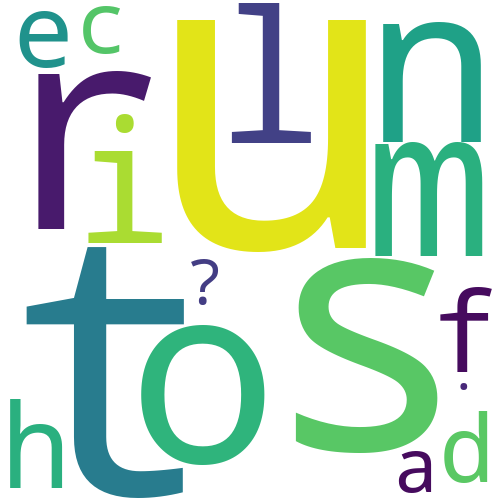

In [41]:
cloud = wc.generate_from_frequencies(vect.vocabulary_)
cloud.to_image()

In [49]:
text  = r'''Now they’re going to see who I am, he said to himself in his strong new man’s voice, many years after he had first seen the huge ocean liner without lights and without any sound which passed by the village one night like a great uninhabited place, longer than the whole village and much taller than the steeple of the church, and it sailed by in the darkness toward the colonial city on the other side of the bay that had been fortified against buccaneers, with its old slave port and the rotating light, whose gloomy beams transfigured the village into a lunar encampment of glowing houses and streets of volcanic deserts every fifteen seconds, and even though at that time he’d been a boy without a man’s strong voice but with his’ mother’s permission to stay very late on the beach to listen to the wind’s night harps, he could still remember, as if still seeing it, how the liner would disappear when the light of the beacon struck its side and how it would reappear when the light had passed, so that it was an intermittent ship sailing along, appearing and disappearing, toward the mouth of the bay, groping its way like a sleep‐walker for the buoys that marked the harbor channel, until something must have gone wrong with the compass needle, because it headed toward the shoals, ran aground, broke up, and sank without a single sound, even though a collision against the reefs like that should have produced a crash of metal and the explosion of engines that would have frozen, with fright the soundest‐sleeping dragons in the prehistoric jungle that began with the last streets of the village and ended on the other side of the world, so that he himself thought it was a dream, especially the, next day, when he. saw the radiant fishbowl. of the bay, the disorder of colors of the Negro shacks on the hills above the harbor, the schooners of the smugglers from the Guianas loading their cargoes ‐of innocent parrots whose craws were full of diamonds, he thought, I fell asleep counting the stars and L dreamed about that huge ship, of course, he was so convinced that he didn’t tell anyone nor did he remember the vision again until the same night on the following March when he was looking for the flash of dolphins in the sea and what he found was the illusory line, gloomy, intermittent, with the same mistaken direction as the first time, except that then he was so sure he was awake that he ran to tell his mother and she spent three weeks moaning with disappointment, because your brain’s rotting away from doing so many things backward, sleeping during the day and going out at night like a criminal, and since she had to go to the city around that time to get something comfortable where she could sit and think about her dead husband, because the rockers on her chair had worn out after eleven years of widowhood, she took advantage of the occasion and had the boatman go near the shoals so that her son could see what he really saw in the glass of; the sea, the lovemaking of manta rays in a springtime of sponges, pink snappers and blue corvinas diving into the other wells of softer waters that were there among the waters, and even the wandering hairs of victims of drowning in some colonial shipwreck, no trace of sunken liners of anything like it, and yet he was so pigheaded that his mother promised to watch with him the next March, absolutely, not knowing that the only thing absolute in her future now was an easy chair from the days of Sir Francis Drake which she had bought at an auction in a Turk’s store, in which she sat down to rest that same night sighing, oh, my poor Olofernos, if you could only see how nice it is to think about you on this velvet lining and this brocade from the casket of a queen, but the more she brought back the memory of her dead husband, the more the blood in her heart bubbled up and turned to chocolate, as if instead of sitting down she were running, soaked from chills and fevers and her breathing full of earth, until he returned at dawn and found her dead in the easy chair, still warm, but half rotted away as after a snakebite, the same as happened afterward to four other women before the murderous chair was thrown into the sea, far away where it wouldn’t bring evil to anyone, because it had. been used so much over the centuries that its faculty for giving rest had been used up, and so he had to grow accustomed to his miserable routine of an orphan who was pointed out by everyone as the son of the widow who had brought the throne of misfortune into the village, living not so much from public charity as from fish he stole out of the boats, while his voice was becoming a roar, and not remembering his visions of past times anymore until another night in March when he chanced to look seaward and suddenly, good Lord, there, it is, the huge asbestos whale, the behemoth beast, come see it, he shouted madly, come see it, raising such an uproar of dogs’ barking and women’s panic that even the oldest men remembered the frights of their great‐grandfathers and crawled under their beds, thinking that William Dampier had come back, but those who ran into the street didn’t make the effort to see the unlikely apparatus which at that instant was lost again in the east and raised up in its annual disaster, but they covered him with blows and left him so twisted that it was then he said to himself, drooling with rage, now they’re going to see who I am, but he took care not to share his determination with anyone, but spent the whole year with the fixed idea, now they’re going to see who I am, waiting for it to be the eve of the apparition once more in order to do what he did, which was steal a boat, cross the bay, and spend the evening waiting for his great moment in the inlets of the slave port, in the human brine of the Caribbean, but so absorbed in his adventure that he didn’t stop as he always did in front of the Hindu shops to look at the ivory mandarins carved from the whole tusk of an elephant, nor did he make fun of the Dutch Negroes in their orthopedic velocipedes, nor was he frightened as at other times of the copper‐skinned Malayans, who had gone around the world, enthralled by the chimera of a secret tavern where they sold roast filets of Brazilian women, because he wasn’t aware of anything until night came over him with all the weight of the stars and the jungle exhaled a sweet fragrance of gardenias and rotter salamanders, and there he was, rowing in the stolen boat, toward the mouth of the bay, with the lantern out so as not to alert the customs police, idealized every fifteen seconds by the green wing flap of the beacon and turned human once more by the darkness, knowing that he was getting close to the buoys that marked the harbor, channel, not only because its oppressive glow was getting more intense, but because the breathing of the water was becoming sad, and he rowed like that, so wrapped up in himself, that he. didn’t know where the fearful shark’s breath that suddenly reached him came from or why the night became dense, as if the stars had suddenly died, and it was because the liner was there, with all of its inconceivable size, Lord, bigger than, any other big thing in the world and darker than any other dark thing on land or sea, three hundred thousand tons of shark smell passing so close to the boat that he could see the seams of the steel precipice without a single light in the infinite portholes, without a sigh from the engines, without a soul, and carrying its own circle of silence with it, its own dead air, its halted time, its errant sea in which a whole world of drowned animals floated, and suddenly it all disappeared with the flash of the beacon and for an instant it was the diaphanous Caribbean once more, the March night, the everyday air of the pelicans, so he stayed alone among the buoys, not knowing what to do, asking himself, startled, if perhaps he wasn’t dreaming while he was awake, not just now but the other times too, but no sooner had. he asked himself than a breath of mystery snuffled out the buoys, from the first to the last, so that when the light of the beacon passed by the liner appeared again and now its compasses were out of order, perhaps not even knowing what part of the ocean sea it was in, groping for the invisible channel but actually heading for the shoals, until he got the overwhelming revelation that that misfortune of the buoys was the last key to the enchantment and he lighted the lantern in the boat, a tiny red light that had no reason to alarm anyone in the watch towers but which would be like a guiding sun for the pilot, because, thanks to it, the liner corrected its course and passed into the main gate of the channel in a maneuver of lucky resurrection, and then all the lights went on at the same time so that the boilers wheezed again, the stars were fixed in their places, and the animal corpses went to the bottom, and there was a clatter of plates and a fragrance of laurel sauce in the kitchens, and one could hear the pulsing of the orchestra on the moon decks and the throbbing of the arteries of high‐sea lovers in the shadows of the staterooms, but he still carried so much leftover rage in him that he would not let himself be confused by emotion or be frightened by the miracle, but said to himself with more decision than ever, now they’re going to see who I am, the cowards, now they’re going to see, and instead of turning aside so that the colossal machine would not charge into him he began to row in front of it, because now they really are going to see who I am, and he continued guiding the ship with the lantern until he was so sure of its obedience that he made it change course from the direction of the docks once more, took it out of the invisible channel, and led it by the halter as if it were a sea lamb toward the lights of the sleeping village, a living ship, invulnerable to the torches of the beacon, that no longer made invisible but made it aluminum every fifteen seconds, and the crosses of the church, the misery of the houses, the illusion began to stand out and still the ocean liner followed behind him, following his will inside of it, the captain asleep on his heart side, the fighting bulls in the snow of their pantries, the solitary patient in the infirmary, the orphan water of its cisterns, the unredeemed pilot who must have mistaken the cliffs for the docks, because at that instant the great roar of the whistle burst forth, once, and he with downpour of steam that fell on him, again, and the boat belonging to someone else was on the point of capsizing, and again, but it was too late, because there were the shells of the shoreline, the stones of the street, the doors of the disbelievers, the whole village illuminated by the lights of the fearsome liner itself, and he barely had time to get out of the way to make room for the cataclysm, shouting in the midst of the confusion, there it is, you cowards, a second before the huge steel cask shattered the ground and one could hear the neat destruction of ninety thousand five hundred champagne glasses breaking, one after the other, from stem to stern, and then the light came out and it was no longer a March dawn but the noon of a radiant Wednesday, and he was able to give himself the pleasure of watching the disbelievers as with open mouths they contemplated the largest ocean liner in this world and the other aground in front of the church, whiter than anything, twenty times taller than the steeple and some ninety‐seven times longer than the village, with its name engraved in iron letters, Halalcsillag, and the ancient and languid waters of the sea of death dripping down its sides.'''

In [69]:
from wordcloud import WordCloud
# vect = CountVectorizer(analyzer='char').fit([text])
vect = CountVectorizer(analyzer='word').fit([text])

array = vect.fit_transform([text]).toarray()
columns = vect.get_feature_names_out()

dict_ = dict(zip(columns, array[0]))
dict_

{'able': 1,
 'about': 3,
 'above': 1,
 'absolute': 1,
 'absolutely': 1,
 'absorbed': 1,
 'accustomed': 1,
 'actually': 1,
 'advantage': 1,
 'adventure': 1,
 'after': 4,
 'afterward': 1,
 'again': 6,
 'against': 2,
 'aground': 2,
 'air': 2,
 'alarm': 1,
 'alert': 1,
 'all': 4,
 'alone': 1,
 'along': 1,
 'aluminum': 1,
 'always': 1,
 'am': 5,
 'among': 2,
 'an': 7,
 'ancient': 1,
 'and': 70,
 'animal': 1,
 'animals': 1,
 'annual': 1,
 'another': 1,
 'any': 3,
 'anymore': 1,
 'anyone': 4,
 'anything': 3,
 'apparatus': 1,
 'apparition': 1,
 'appeared': 1,
 'appearing': 1,
 'are': 1,
 'around': 2,
 'arteries': 1,
 'as': 13,
 'asbestos': 1,
 'aside': 1,
 'asked': 1,
 'asking': 1,
 'asleep': 2,
 'at': 9,
 'auction': 1,
 'awake': 2,
 'aware': 1,
 'away': 3,
 'back': 2,
 'backward': 1,
 'barely': 1,
 'barking': 1,
 'bay': 5,
 'be': 4,
 'beach': 1,
 'beacon': 5,
 'beams': 1,
 'beast': 1,
 'became': 1,
 'because': 12,
 'becoming': 2,
 'beds': 1,
 'been': 4,
 'before': 2,
 'began': 3,
 'behemoth':

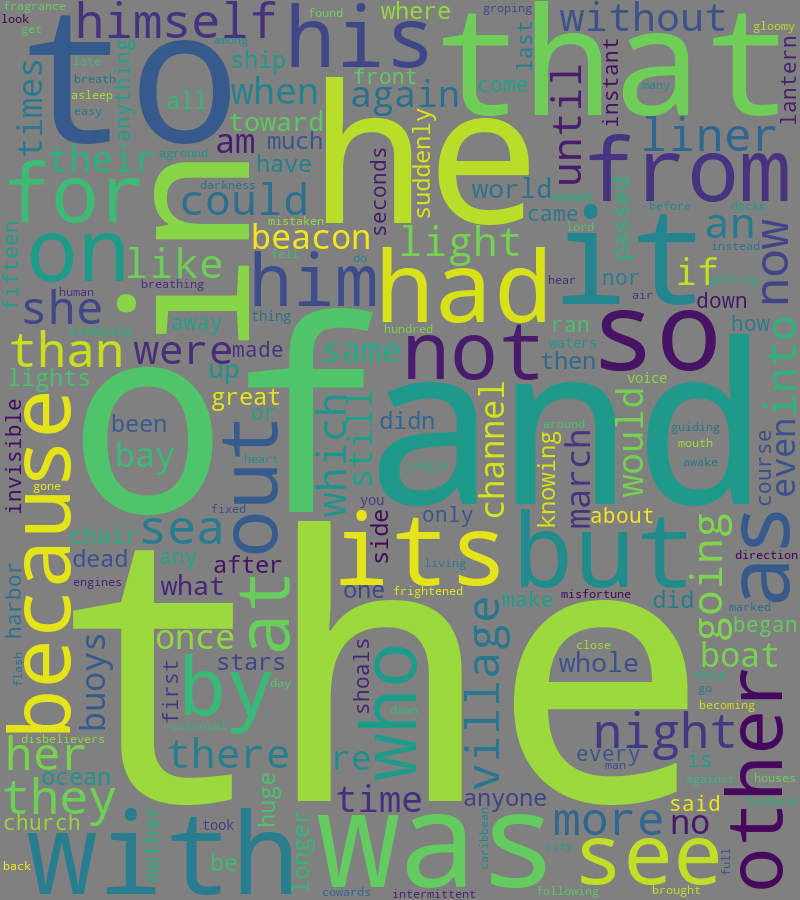

In [71]:
wc = WordCloud(background_color="gray",width=800,height=900)
cloud = wc.generate_from_frequencies(dict_)
cloud.to_image()

In [72]:
def asdf(*attrs, **kattrs):
    print(attrs)
    print(kattrs)

asdf(1, 2, 3, a=1, b=2, c=3)

(1, 2, 3)
{'a': 1, 'b': 2, 'c': 3}
